# 4km WRF Simulation of Current Climate over South America by SAAG: diagnostic plots

### Input Data Access

- This notebook illustrates how to make diagnostic plots using the dataset produced by the South America Affinity Group (SAAG) hosted on NCAR's glade storage.
- https://rda.ucar.edu/datasets/d616000/#
- This data is open access and can be accessed via 3 protocols
    1) posix (if you have access to NCAR's HPC systems)
    2) HTTPS or
    3) OSDF using an intake-ESM catalog.

In [ ]:
import intake
import warnings
warnings.filterwarnings("ignore")

In [27]:
# import fsspec.implementations.http as fshttp
# from pelicanfs.core import PelicanFileSystem, PelicanMap, OSDFFileSystem 

In [28]:
from dask_jobqueue import PBSCluster
from dask.distributed import Client

In [37]:
rda_scratch = '/glade/campaign/collections/rda/scratch/harshah'
# cat_url     = '/glade/campaign/collections/rda/data/d616000/catalogs/d616000_catalog.json' #POSIX access on NCAR
cat_url     = 'https://data-osdf.rda.ucar.edu/ncar/rda/d616000/catalogs/d616000_catalog-http.json' #HTTPS access
# cat_url     = 'https://data-osdf.rda.ucar.edu/ncar/rda/d616000/catalogs/d616000_catalog-osdf.json' #OSDF access
print(cat_url)

https://data-osdf.rda.ucar.edu/ncar/rda/d616000/catalogs/d616000_catalog-http.json


## Create a PBS cluster

In [5]:
# Create a PBS cluster object
cluster = PBSCluster(
    job_name = 'dask-wk24-hpc',
    cores = 1,
    memory = '10GiB',
    processes = 1,
    local_directory = rda_scratch+'/dask/spill',
    log_directory = rda_scratch + '/dask/logs/',
    resource_spec = 'select=1:ncpus=1:mem=10GB',
    queue = 'casper',
    walltime = '5:00:00',
    #interface = 'ib0'
    interface = 'ext'
)

client = Client(cluster)

In [6]:
# Scale the cluster and display cluster dashboard URL
n_workers = 5
cluster.scale(n_workers)
client.wait_for_workers(n_workers = n_workers)
cluster

## Load SAAG data from RDA using an intake catalog

In [38]:
col = intake.open_esm_datastore(cat_url)
col

In [39]:
col.df

path variable     format  \
0     https://data.rda.ucar.edu/d616000/kerchunk/199...   ACDEWC  reference   
1     https://data.rda.ucar.edu/d616000/kerchunk/199...  ACDRIPR  reference   
2     https://data.rda.ucar.edu/d616000/kerchunk/199...  ACDRIPS  reference   
3     https://data.rda.ucar.edu/d616000/kerchunk/199...   ACECAN  reference   
4     https://data.rda.ucar.edu/d616000/kerchunk/199...   ACEDIR  reference   
...                                                 ...      ...        ...   
4901  https://data.rda.ucar.edu/d616000/kerchunk/202...        V  reference   
4902  https://data.rda.ucar.edu/d616000/kerchunk/202...        W  reference   
4903  https://data.rda.ucar.edu/d616000/kerchunk/202...        Z  reference   
4904  https://data.rda.ucar.edu/d616000/kerchunk/202...     ilev  reference   
4905  https://data.rda.ucar.edu/d616000/kerchunk/202...      lev  reference   

     short_name                                          long_name  \
0        ACDEWC  Accumulated canopy dew rate, accumulated over ...   
1       ACDRIPR  Accumulated canopy precipitation drip rate, ac...   
2       ACDRIPS  Accumulated canopy snow drip rate, accumulated...   
3        ACECAN  Accumulated net evaporation of canopy water (e...   
4        ACEDIR  Accumulated net soil evaporation or snowpack s...   
...         ...                                                ...   
4901          V                                                NaN   
4902          W                                                NaN   
4903          Z                                                NaN   
4904       ilev                            vertical stagger levels   
4905        lev                                    vertical levels   

              units  start_time             end_time  level  level_units  \
0                mm  1999-12-31  1999-12-31 23:00:00    NaN          NaN   
1                mm  1999-12-31  1999-12-31 23:00:00    NaN          NaN   
2                mm  1999-12-31  1999-12-31 23:00:00    NaN          NaN   
3                mm  1999-12-31  1999-12-31 23:00:00    NaN          NaN   
4                mm  1999-12-31  1999-12-31 23:00:00    NaN          NaN   
...             ...         ...                  ...    ...          ...   
4901          m s-1  2020-01-01  2020-12-31 21:00:00    NaN          NaN   
4902          m s-1  2020-01-01  2020-12-31 21:00:00    NaN          NaN   
4903              m  2020-01-01  2020-12-31 21:00:00    NaN          NaN   
4904  Dimensionless  2020-01-01  2020-12-31 21:00:00    NaN          NaN   
4905  Dimensionless  2020-01-01  2020-12-31 21:00:00    NaN          NaN   

            frequency  
0     0 days 01:00:00  
1     0 days 01:00:00  
2     0 days 01:00:00  
3     0 days 01:00:00  
4     0 days 01:00:00  
...               ...  
4901  0 days 03:00:00  
4902  0 days 03:00:00  
4903  0 days 03:00:00  
4904  0 days 03:00:00  
4905  0 days 03:00:00  

[4906 rows x 11 columns]

## Select data and plot

### Temperature
- Plot temperature for a random date

In [40]:
cat_temp = col.search(variable='T2')
cat_temp.df.head()

path variable     format  \
0  https://data.rda.ucar.edu/d616000/kerchunk/199...       T2  reference   
1  https://data.rda.ucar.edu/d616000/kerchunk/200...       T2  reference   
2  https://data.rda.ucar.edu/d616000/kerchunk/200...       T2  reference   
3  https://data.rda.ucar.edu/d616000/kerchunk/200...       T2  reference   
4  https://data.rda.ucar.edu/d616000/kerchunk/200...       T2  reference   

  short_name long_name units  start_time             end_time  level  \
0         T2       NaN     K  1999-12-31  1999-12-31 23:00:00    NaN   
1         T2       NaN     K  2000-01-01  2000-12-31 23:00:00    NaN   
2         T2       NaN     K  2001-01-01  2001-12-31 23:00:00    NaN   
3         T2       NaN     K  2002-01-01  2002-12-31 23:00:00    NaN   
4         T2       NaN     K  2003-01-01  2003-12-31 23:00:00    NaN   

   level_units        frequency  
0          NaN  0 days 01:00:00  
1          NaN  0 days 01:00:00  
2          NaN  0 days 01:00:00  
3          NaN  0 days 01:00:00  
4          NaN  0 days 01:00:00

- The data is organized in (virtual) zarr stores with one water year's worth of data in one file
- Select a year


In [9]:
date = "2020-01-01"
# year = "2021"
cat_temp_subset = cat_temp.search(start_time = date)
cat_temp_subset

### Load data into xarray

In [10]:
# Load catalog entries for subset into a dictionary of xarray datasets, and open the first one.
dsets = cat_temp_subset.to_dataset_dict(zarr_kwargs={"consolidated": True})
print(f"\nDataset dictionary keys:\n {dsets.keys()}")


--> The keys in the returned dictionary of datasets are constructed as follows:
	'variable.short_name'



Dataset dictionary keys:
 dict_keys(['T2.T2'])


In [11]:
# Load the first dataset and display a summary.
dataset_key = list(dsets.keys())[0]
# store_name = dataset_key + ".zarr"
print(dsets.keys())
ds = dsets[dataset_key]
ds = ds.T2
ds

dict_keys(['T2.T2'])


<xarray.DataArray 'T2' (Time: 8784, south_north: 2027, west_east: 1471)> Size: 105GB
dask.array<open_dataset-T2, shape=(8784, 2027, 1471), dtype=float32, chunksize=(1, 1014, 736), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) datetime64[ns] 70kB 2020-01-01 ... 2020-12-31T23:00:00
    XLAT     (Time, south_north, west_east) float32 105GB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    XLONG    (Time, south_north, west_east) float32 105GB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    XTIME    (Time) datetime64[ns] 70kB dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east
Attributes:
    description:  TEMP at 2 M
    stagger:       
    units:        K

In [12]:
%%time
desired_date = "2020-10-01"
ds_subset = ds.sel(Time=desired_date,method='nearest')
ds_subset

CPU times: user 8.71 ms, sys: 2.38 ms, total: 11.1 ms
Wall time: 39.1 ms


<xarray.DataArray 'T2' (south_north: 2027, west_east: 1471)> Size: 12MB
dask.array<getitem, shape=(2027, 1471), dtype=float32, chunksize=(1014, 736), chunktype=numpy.ndarray>
Coordinates:
    Time     datetime64[ns] 8B 2020-10-01
    XLAT     (south_north, west_east) float32 12MB dask.array<chunksize=(1014, 736), meta=np.ndarray>
    XLONG    (south_north, west_east) float32 12MB dask.array<chunksize=(1014, 736), meta=np.ndarray>
    XTIME    datetime64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east
Attributes:
    description:  TEMP at 2 M
    stagger:       
    units:        K

CPU times: user 479 ms, sys: 112 ms, total: 592 ms
Wall time: 1.27 s


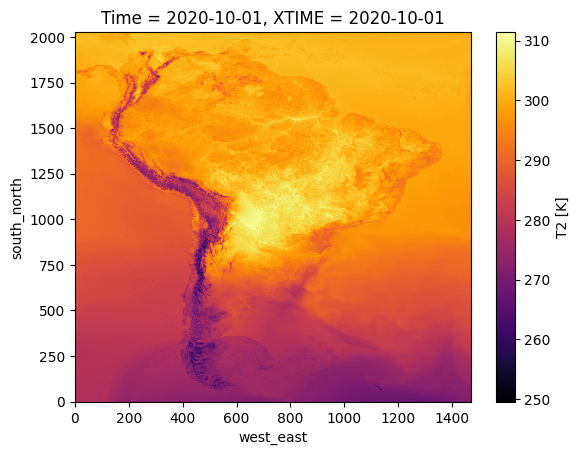

In [13]:
%%time
ds_subset.plot(cmap='inferno')

In [41]:
cluster.close()

NameError: name 'cluster' is not defined